# Stock Price Analysis: BMW vs. Mercedes

This notebook presents an analysis and prediction of stock prices for BMW and Mercedes using historical data. We’ll explore the stock data, create visualizations, and build predictive models to gain insights and make future predictions. The models will help us determine which factors influence stock prices and provide a forecast for both BMW and Mercedes.


## 1. Importing libraries

To start, we import the necessary libraries for data manipulation, visualization, and modeling. These include pandas, matplotlib, and machine learning tools from sklearn.

In [ ]:
!pip install yfinance pandas matplotlib seaborn scikit-learn pycaret sagemaker

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import yfinance as yf

# Set plot style
sns.set(style="whitegrid")

## 2. Data collection

We fetch historical stock data for BMW and Mercedes using yfinance. This step ensures we have a comprehensive dataset spanning multiple decades.

In [2]:
# Fetch historical stock data
bmw = yf.download("BMW.DE", start="1970-01-01", end="2024-01-01")
mercedes = yf.download("MBG.DE", start="1970-01-01", end="2024-01-01")

# Save full data to CSV
bmw.to_csv("Datasets/bmw_stock_data.csv")
mercedes.to_csv("Datasets/mercedes_stock_data.csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## 3. Data loading Stockprice

In [3]:
# Load the BMW and Mercedes stock data
bmw = pd.read_csv('Datasets/bmw_stock_data.csv', skiprows=2, names=["Date", "Adj Close", "Close", "High", "Low", "Open", "Volume"])
mercedes = pd.read_csv('Datasets/mercedes_stock_data.csv', skiprows=2, names=["Date", "Adj Close", "Close", "High", "Low", "Open", "Volume"])

## 4. Data Cleaning

After loading the data, we need to ensure that the columns have the correct formats and remove any irregular data points. We’ll convert dates to datetime, set them as indices, and ensure numerical columns are properly formatted.


In [4]:
# Remove rows where 'Date' is invalid or contains non-date values
bmw = bmw[pd.to_datetime(bmw['Date'], errors='coerce').notna()]
mercedes = mercedes[pd.to_datetime(mercedes['Date'], errors='coerce').notna()]

# Convert 'Date' column to datetime format
bmw['Date'] = pd.to_datetime(bmw['Date'])
mercedes['Date'] = pd.to_datetime(mercedes['Date'])

# Set 'Date' as the index
bmw.set_index('Date', inplace=True)
mercedes.set_index('Date', inplace=True)

# Convert price-related columns to numeric data types
for col in ["Adj Close", "Close", "High", "Low", "Open", "Volume"]:
    bmw[col] = pd.to_numeric(bmw[col], errors='coerce')
    mercedes[col] = pd.to_numeric(mercedes[col], errors='coerce')


# Filter the data for training (2000 to 2022)
bmw_train = bmw.loc['2000-01-01':'2020-12-31']
mercedes_train = mercedes.loc['2000-01-01':'2022-12-31']

# Check for missing values
print("BMW missing values:\n", bmw.isnull().sum())
print("Mercedes missing values:\n", mercedes.isnull().sum())

BMW missing values:
 Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64
Mercedes missing values:
 Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


C:\Users\redwan\AppData\Local\Temp\ipykernel_2300\2522383450.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bmw = bmw[pd.to_datetime(bmw['Date'], errors='coerce').notna()]
C:\Users\redwan\AppData\Local\Temp\ipykernel_2300\2522383450.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mercedes = mercedes[pd.to_datetime(mercedes['Date'], errors='coerce').notna()]


# 5. Overview of stockprices the last decades 
## 5.1 BMW

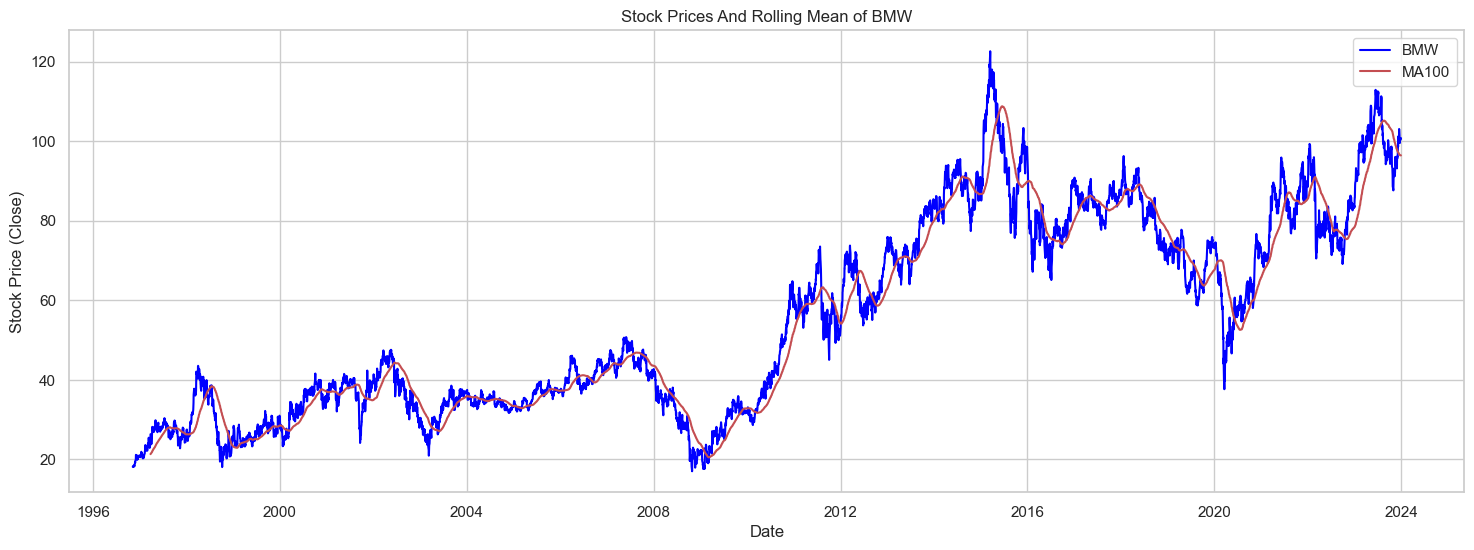

In [5]:
ma100=bmw.Close.rolling(100).mean()

plt.figure(figsize=(18, 6))
plt.plot(bmw['Close'], label='BMW', color='blue')
plt.plot(ma100,'r', label='MA100')
plt.title("Stock Prices And Rolling Mean of BMW")
plt.xlabel("Date")
plt.ylabel("Stock Price (Close)")
plt.legend()
plt.show()

## 5.2 Mercedes

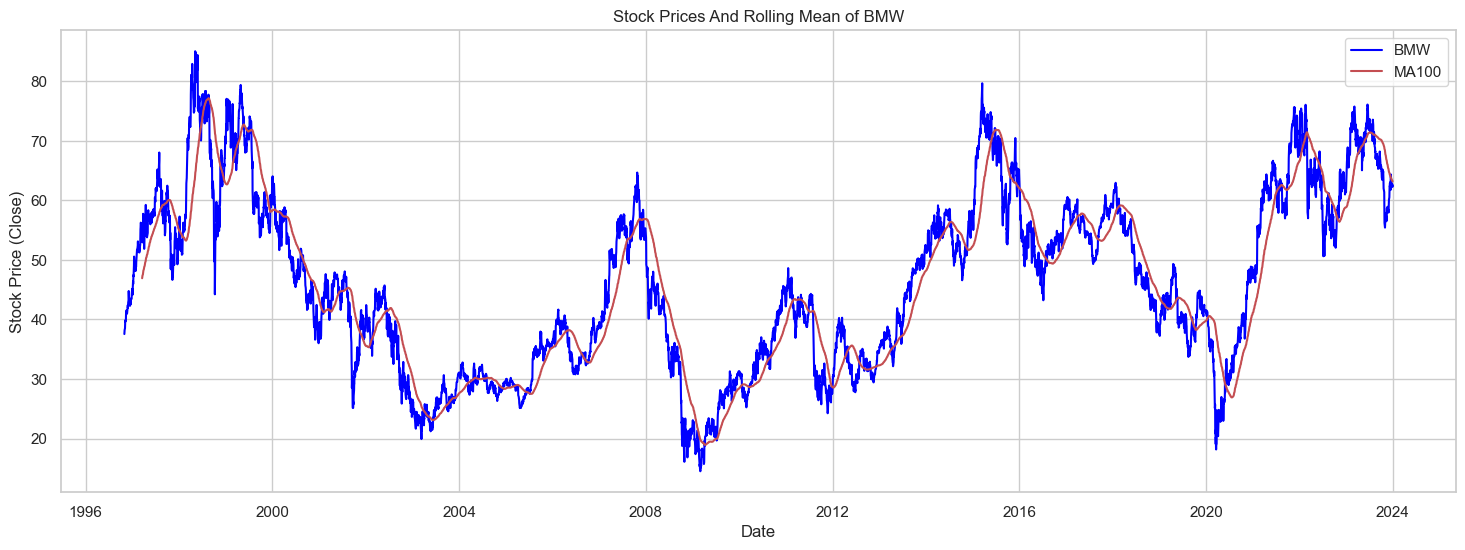

In [6]:
ma100=mercedes.Close.rolling(100).mean()

plt.figure(figsize=(18, 6))
plt.plot(mercedes['Close'], label='BMW', color='blue')
plt.plot(ma100,'r', label='MA100')
plt.title("Stock Prices And Rolling Mean of BMW")
plt.xlabel("Date")
plt.ylabel("Stock Price (Close)")
plt.legend()
plt.show()

## 5.3 Comparing BMW Vs Mercedes Closing Stockprice
We’ll start by exploring the stock price trends for both BMW and Mercedes. Analyzing the closing prices over time helps us observe any significant fluctuations or trends. The spike of stockprices ramped up in 2015 because of the introduction of new models, including advancements in their electric vehicle lineup, boosted investor confidence and market interest .


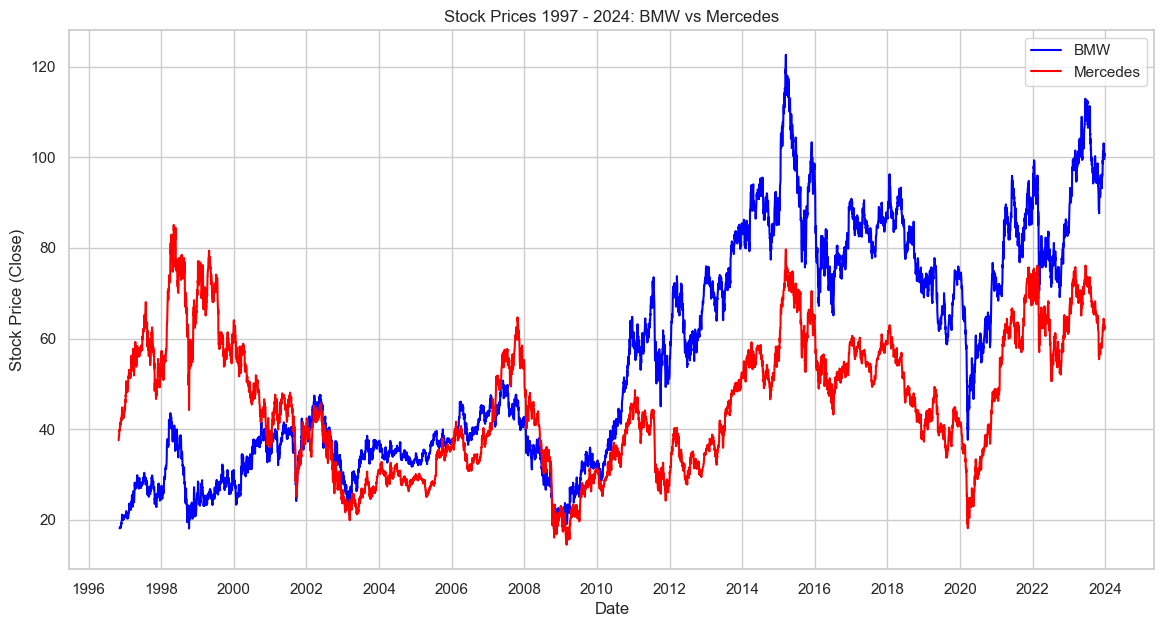

In [7]:
import matplotlib.dates as mdates

# Plot the closing prices of BMW and Mercedes over time
plt.figure(figsize=(14, 7))
plt.plot(bmw['Close'], label='BMW', color='blue')
plt.plot(mercedes['Close'], label='Mercedes', color='red')
plt.title("Stock Prices 1997 - 2024: BMW vs Mercedes")
plt.xlabel("Date")
plt.ylabel("Stock Price (Close)")
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.legend()
plt.show()

## 5.4  Impact of COVID-19 on Stock Prices

We analyze the price trends during the COVID-19 period (2019-2024) to identify significant changes. Both companies faced unprecedented challenges during the COVID-19 period, but BMW's strategic resilience and market positioning helped it weather the storm slightly better than Mercedes-Benz.


In [ ]:
# Filter data to focus on the period around COVID-19 (2019-2024)
bmw_covid = bmw['2019-01-01':'2024-12-31']
mercedes_covid = mercedes['2019-01-01':'2024-12-31']

# Find the highest pre-COVID price (January 2020)
bmw_pre_covid = bmw_covid['2020-01-01':'2020-01-31']['Close'].max()
mercedes_pre_covid = mercedes_covid['2020-01-01':'2020-01-31']['Close'].max()

# Find the lowest price during the COVID-19 period (March 2020)
bmw_covid_drop = bmw_covid['2020-02-01':'2020-04-30']['Close'].min()
mercedes_covid_drop = mercedes_covid['2020-02-01':'2020-04-30']['Close'].min()

# Calculate the percentage drop for both BMW and Mercedes
bmw_drop_percentage = ((bmw_pre_covid - bmw_covid_drop) / bmw_pre_covid) * 100
mercedes_drop_percentage = ((mercedes_pre_covid - mercedes_covid_drop) / mercedes_pre_covid) * 100

# Print out the percentage drops
print(f"BMW's stock dropped by {bmw_drop_percentage.item():.2f}% during the COVID-19 period.")
print(f"Mercedes' stock dropped by {mercedes_drop_percentage.item():.2f}% during the COVID-19 period.")

# Plot the closing prices of BMW and Mercedes during COVID-19 period
plt.figure(figsize=(14, 7))
plt.plot(bmw_covid['Close'], label='BMW', color='blue')
plt.plot(mercedes_covid['Close'], label='Mercedes', color='red')

# Highlight the dip and recovery due to COVID-19
plt.axvspan('2020-02-01', '2020-05-01', color='gray', alpha=0.5, label='COVID-19 Impact')

# Set the title, labels, and x-axis tick formatting
plt.title("Stock Prices (2019 - 2024): BMW vs Mercedes - COVID-19 Impact")
plt.xlabel("Date")
plt.ylabel("Stock Price (EUR)")

# Format x-axis to display every 6 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Display the legend
plt.legend()

# Show the plot
plt.show()

## 5.5 Seasonal Trends

Seasonal trends reveal cyclical stock price patterns. Below, we compare trends for the entire dataset and the last 5 years.

In [ ]:
# Filter data for the last 5 years (2019-2024)
bmw_last_5_years = bmw['2019-01-01':'2024-12-31']
mercedes_last_5_years = mercedes['2019-01-01':'2024-12-31']

# Add a 'Month' column for the full dataset
bmw['Month'] = bmw.index.month
mercedes['Month'] = mercedes.index.month

# Calculate monthly averages for the full dataset
bmw_monthly_avg_full = bmw.groupby('Month')['Close'].mean()
mercedes_monthly_avg_full = mercedes.groupby('Month')['Close'].mean()

# Add a 'Month' column for the last 5 years
bmw_last_5_years['Month'] = bmw_last_5_years.index.month
mercedes_last_5_years['Month'] = mercedes_last_5_years.index.month

# Calculate monthly averages for the last 5 years
bmw_monthly_avg_5_years = bmw_last_5_years.groupby('Month')['Close'].mean()
mercedes_monthly_avg_5_years = mercedes_last_5_years.groupby('Month')['Close'].mean()

# Plot seasonal trends for both the full dataset and the last 5 years
plt.figure(figsize=(14, 7))

# Plot for BMW
plt.plot(bmw_monthly_avg_full, label='BMW Monthly Average (1997 - 2024)', color='blue', linestyle='-', marker='o')
plt.plot(bmw_monthly_avg_5_years, label='BMW Monthly Average (Last 5 Years)', color='blue', linestyle='--', marker='x')

# Plot for Mercedes
plt.plot(mercedes_monthly_avg_full, label='Mercedes Monthly Average (1997 - 2024)', color='red', linestyle='-', marker='o')
plt.plot(mercedes_monthly_avg_5_years, label='Mercedes Monthly Average (Last 5 Years)', color='red', linestyle='--', marker='x')

# Add title and labels
plt.title("Seasonal Trends: BMW vs. Mercedes (1997 - 2024 vs Last 5 Years)")
plt.xlabel("Month")
plt.ylabel("Average Stock Price")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add legend
plt.legend()

# Show the plot
plt.show()

## 5.6 Pricechanges in Percentage Vs Stockprice BMW vs Mercedes

In [ ]:
bmw['Price Change (%)'] = bmw['Close'].pct_change() * 100
mercedes['Price Change (%)'] = mercedes['Close'].pct_change() * 100

plt.figure(figsize=(10, 6))
plt.scatter(bmw['Close'], bmw['Price Change (%)'], color='blue', label='BMW')
plt.scatter(mercedes['Close'], mercedes['Price Change (%)'], color='red', alpha=0.3, label='Mercedes')
plt.title("Percentage Change vs. Stock Price: BMW vs. Mercedes")
plt.xlabel("Stock Price (Close)")
plt.ylabel("Percentage Change (%)")
plt.legend()
plt.show()